In [ ]:
You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

In [13]:
'''Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.
--------'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns

dataset=pd.read_csv('diabetes.csv')

dataset.head()

#dataset.info()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
'''Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.
--------'''
## missing values
dataset[dataset.isnull().any(axis=1)]

x=dataset.drop(['Outcome'], axis=1)
y=dataset.Outcome

x,y

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 0              6      148             72             35        0  33.6   
 1              1       85             66             29        0  26.6   
 2              8      183             64              0        0  23.3   
 3              1       89             66             23       94  28.1   
 4              0      137             40             35      168  43.1   
 ..           ...      ...            ...            ...      ...   ...   
 763           10      101             76             48      180  32.9   
 764            2      122             70             27        0  36.8   
 765            5      121             72             23      112  26.2   
 766            1      126             60              0        0  30.1   
 767            1       93             70             31        0  30.4   
 
      DiabetesPedigreeFunction  Age  
 0                       0.627   50  
 1                    

In [20]:
'''Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.
----------'''

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=1)
      

In [22]:
'''Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.
----------'''
model = DecisionTreeClassifier()

model = model.fit(x_train,y_train)

y_pred = model.predict(x_test)

In [24]:
'''Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.
----------'''
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

print("Accuracy:",((82+27)/154))

#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


Accuracy: 69.48051948051948
Accuracy: 0.7077922077922078
              precision    recall  f1-score   support

           0       0.75      0.79      0.77        99
           1       0.58      0.53      0.55        55

    accuracy                           0.69       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.69      0.69       154



[Text(0.41152815013404825, 0.9666666666666667, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.1601876675603217, 0.9, 'x[7] <= 28.5\ngini = 0.311\nsamples = 389\nvalue = [314, 75]'),
 Text(0.08847184986595175, 0.8333333333333334, 'x[5] <= 45.4\ngini = 0.167\nsamples = 217\nvalue = [197, 20]'),
 Text(0.058981233243967826, 0.7666666666666667, 'x[5] <= 30.95\ngini = 0.147\nsamples = 213\nvalue = [196, 17]'),
 Text(0.032171581769437, 0.7, 'x[0] <= 7.5\ngini = 0.031\nsamples = 126\nvalue = [124, 2]'),
 Text(0.021447721179624665, 0.6333333333333333, 'x[6] <= 0.668\ngini = 0.016\nsamples = 125\nvalue = [124, 1]'),
 Text(0.010723860589812333, 0.5666666666666667, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(0.032171581769437, 0.5666666666666667, 'x[5] <= 23.55\ngini = 0.133\nsamples = 14\nvalue = [13, 1]'),
 Text(0.021447721179624665, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.04289544235924933, 0.5, 'gini = 0.0\nsamples = 13\nvalue = [13, 0]'),

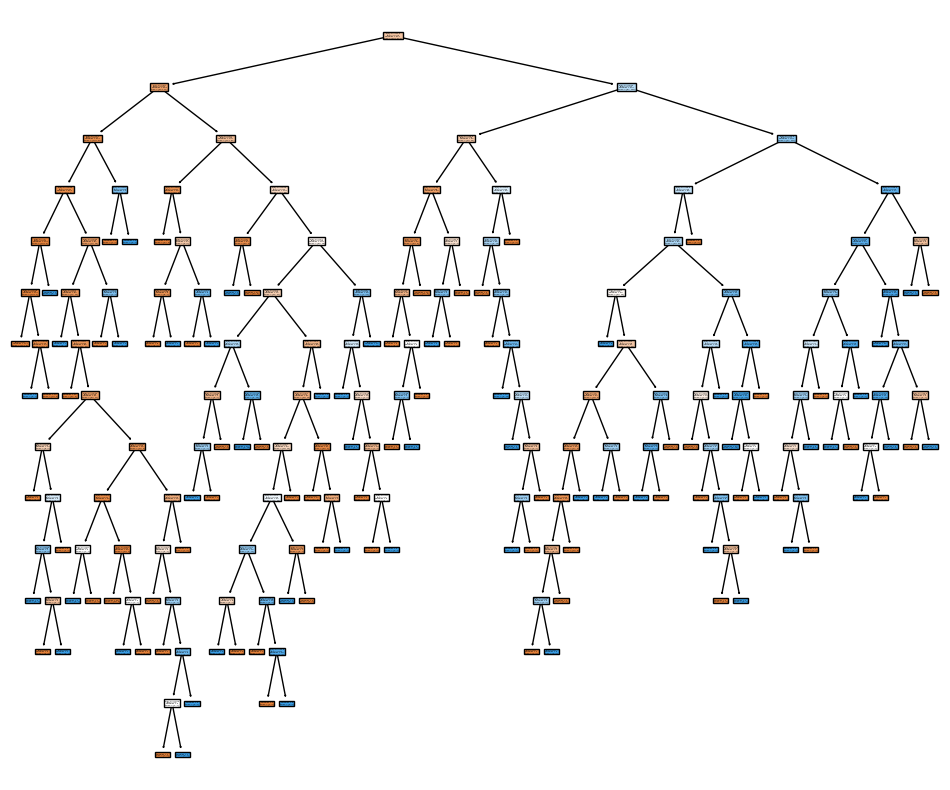

In [31]:
'''Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.
---------'''

from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(model,filled=True)


In [32]:
Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.
---------
# Create Decision Tree classifer object
model = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

SyntaxError: invalid syntax (2822636490.py, line 1)